Preparing the IMDB data

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence



In [5]:
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')

Loading data...


In [6]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [7]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

Training the model with Embedding and SimpleRNN layers

In [10]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 40s 236ms/step - loss: 0.6017 - acc: 0.6658 - val_loss: 0.4665 - val_acc: 0.7962
Epoch 2/10
157/157 [==============================] - 49s 312ms/step - loss: 0.3954 - acc: 0.8315 - val_loss: 0.3683 - val_acc: 0.8490
Epoch 3/10
157/157 [==============================] - 41s 260ms/step - loss: 0.3057 - acc: 0.8773 - val_loss: 0.3995 - val_acc: 0.8248
Epoch 4/10
157/157 [==============================] - 41s 262ms/step - loss: 0.2564 - acc: 0.9004 - val_loss: 0.3625 - val_acc: 0.8524
Epoch 5/10
157/157 [==============================] - 42s 266ms/step - loss: 0.1987 - acc: 0.9269 - val_loss: 0.4058 - val_acc: 0.8562
Epoch 6/10
157/157 [==============================] - 36s 226ms/step - loss: 0.1619 - acc: 0.9416 - val_loss: 0.4471 - val_acc: 0.8514
Epoch 7/10
157/157 [==============================] - 37s 237ms/step - loss: 0.1263 - acc: 0.9570 - val_loss: 0.4297 - val_acc: 0.8734
Epoch 8/10
157/157 [==============================] - 4

Plotting results

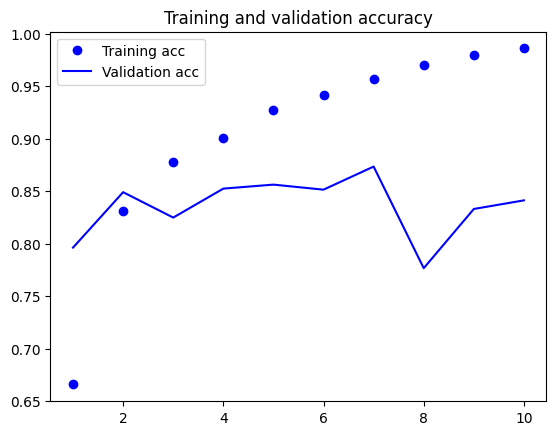

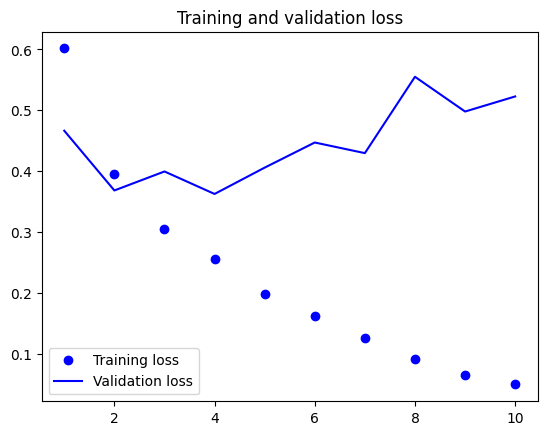

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Training the model with Embedding and SimpleRNN layers

In [12]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 111s 677ms/step - loss: 0.6177 - acc: 0.6478 - val_loss: 0.4521 - val_acc: 0.8194
Epoch 2/10
157/157 [==============================] - 97s 619ms/step - loss: 0.3608 - acc: 0.8492 - val_loss: 0.5076 - val_acc: 0.8392
Epoch 3/10
157/157 [==============================] - 102s 650ms/step - loss: 0.2746 - acc: 0.8917 - val_loss: 0.3377 - val_acc: 0.8556
Epoch 4/10
157/157 [==============================] - 98s 623ms/step - loss: 0.2288 - acc: 0.9136 - val_loss: 0.3339 - val_acc: 0.8736
Epoch 5/10
157/157 [==============================] - 106s 675ms/step - loss: 0.2064 - acc: 0.9235 - val_loss: 0.2919 - val_acc: 0.8770
Epoch 6/10
157/157 [==============================] - 110s 700ms/step - loss: 0.1809 - acc: 0.9342 - val_loss: 0.3331 - val_acc: 0.8786
Epoch 7/10
157/157 [==============================] - 122s 779ms/step - loss: 0.1643 - acc: 0.9420 - val_loss: 0.3598 - val_acc: 0.8616
Epoch 8/10
157/157 [==============================

Plotting results

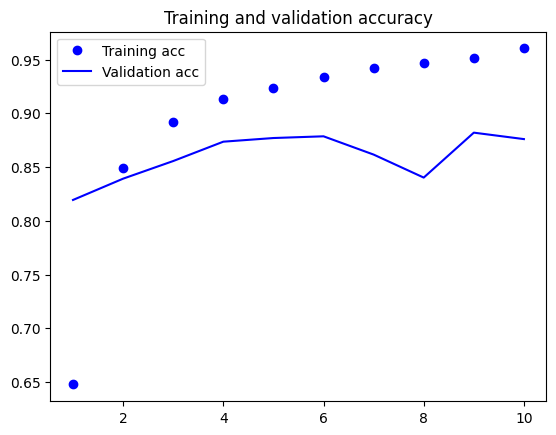

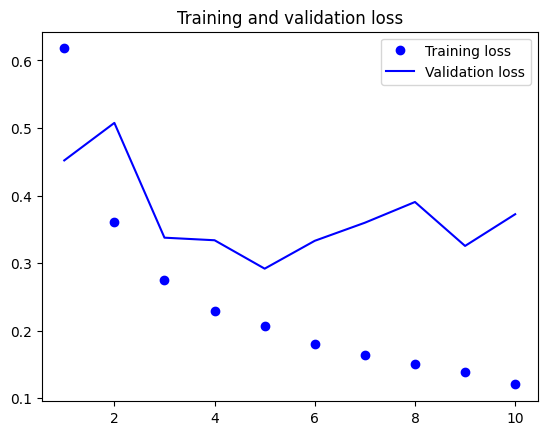

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()